In [1]:
pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os # We'll use this to create a new folder

# Set options to see all columns
pd.set_option('display.max_columns', None)

print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
# Load the dataset
df = pd.read_csv('Dataset.csv')

# Display the first 5 rows
print("Original data:")
df.head()

Original data:


,timestamp,generation_biomass,generation_lignite_coal,generation_coal_gas,generation_natural_gas,generation_hard_coal,generation_oil,generation_oil_shale,generation_peat,generation_geothermal,generation_hydro_pump_used,generation_hydro_river,generation_hydro_reservoir,generation_marine,generation_nuclear,generation_other,generation_other_renewable,generation_solar,generation_waste,generation_wind_offshore,generation_wind_onshore,solar_forecast,wind_onshore_forecast,load_forecast,load_actual,price_forecast,price_actual
0,2015-01-01 00:00:00+01:00,447,329,0,4844,4821,162,0,0,0,863,1051,1899,0,7096,43,73,49,196,0,6378,17,6436,26118,25385,50.10,65.41
1,2015-01-01 01:00:00+01:00,449,328,0,5196,4755,158,0,0,0,920,1009,1658,0,7096,43,71,50,195,0,5890,16,5856,24934,24382,48.10,64.92
2,2015-01-01 02:00:00+01:00,448,323,0,4857,4581,157,0,0,0,1164,973,1371,0,7099,43,73,50,196,0,5461,8,5454,23515,22734,47.33,64.48
3,2015-01-01 03:00:00+01:00,438,254,0,4314,4131,160,0,0,0,1503,949,779,0,7098,43,75,50,191,0,5238,2,5151,22642,21286,42.27,59.32
4,2015-01-01 04:00:00+01:00,428,187,0,4130,3840,156,0,0,0,1826,953,720,0,7097,43,74,42,189,0,4935,9,4861,21785,20264,38.41,56.04


In [4]:
# Check column names, data types, and if there are any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   timestamp                   35064 non-null  object 
 1   generation_biomass          35064 non-null  int64  
 2   generation_lignite_coal     35064 non-null  int64  
 3   generation_coal_gas         35064 non-null  int64  
 4   generation_natural_gas      35064 non-null  int64  
 5   generation_hard_coal        35064 non-null  int64  
 6   generation_oil              35064 non-null  int64  
 7   generation_oil_shale        35064 non-null  int64  
 8   generation_peat             35064 non-null  int64  
 9   generation_geothermal       35064 non-null  int64  
 10  generation_hydro_pump_used  35064 non-null  int64  
 11  generation_hydro_river      35064 non-null  int64  
 12  generation_hydro_reservoir  35064 non-null  int64  
 13  generation_marine           350

In [5]:
print("Starting data cleaning...")

# 1. Convert 'timestamp' from string to a real datetime object
# We use 'utc=True' to properly handle the timezone info (+01:00)
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)

# 2. Set the timestamp as the index. This is standard for time-series.
df = df.set_index('timestamp')

# 3. Let's check our work
print("Data cleaned. New data format:")
df.info()
print("\nNew data (head):")
df.head()

Starting data cleaning...
Data cleaned. New data format:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   generation_biomass          35064 non-null  int64  
 1   generation_lignite_coal     35064 non-null  int64  
 2   generation_coal_gas         35064 non-null  int64  
 3   generation_natural_gas      35064 non-null  int64  
 4   generation_hard_coal        35064 non-null  int64  
 5   generation_oil              35064 non-null  int64  
 6   generation_oil_shale        35064 non-null  int64  
 7   generation_peat             35064 non-null  int64  
 8   generation_geothermal       35064 non-null  int64  
 9   generation_hydro_pump_used  35064 non-null  int64  
 10  generation_hydro_river      35064 non-null  int64  
 11  generation_hydro_reservoir  35064 non-nul

,generation_biomass,generation_lignite_coal,generation_coal_gas,generation_natural_gas,generation_hard_coal,generation_oil,generation_oil_shale,generation_peat,generation_geothermal,generation_hydro_pump_used,generation_hydro_river,generation_hydro_reservoir,generation_marine,generation_nuclear,generation_other,generation_other_renewable,generation_solar,generation_waste,generation_wind_offshore,generation_wind_onshore,solar_forecast,wind_onshore_forecast,load_forecast,load_actual,price_forecast,price_actual
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447,329,0,4844,4821,162,0,0,0,863,1051,1899,0,7096,43,73,49,196,0,6378,17,6436,26118,25385,50.10,65.41
2015-01-01 00:00:00+00:00,449,328,0,5196,4755,158,0,0,0,920,1009,1658,0,7096,43,71,50,195,0,5890,16,5856,24934,24382,48.10,64.92
2015-01-01 01:00:00+00:00,448,323,0,4857,4581,157,0,0,0,1164,973,1371,0,7099,43,73,50,196,0,5461,8,5454,23515,22734,47.33,64.48
2015-01-01 02:00:00+00:00,438,254,0,4314,4131,160,0,0,0,1503,949,779,0,7098,43,75,50,191,0,5238,2,5151,22642,21286,42.27,59.32
2015-01-01 03:00:00+00:00,428,187,0,4130,3840,156,0,0,0,1826,953,720,0,7097,43,74,42,189,0,4935,9,4861,21785,20264,38.41,56.04


In [6]:
print("Starting feature engineering...")

# Create Temporal Features (from the datetime index)
# This is how the model learns daily, weekly, and yearly cycles
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek  # 0=Monday, 6=Sunday
df['month'] = df.index.month
df['quarter'] = df.index.quarter
df['day_of_year'] = df.index.dayofyear
df['year'] = df.index.year

print("Feature engineering complete. Data with new features:")
df.head()

Starting feature engineering...
Feature engineering complete. Data with new features:


,generation_biomass,generation_lignite_coal,generation_coal_gas,generation_natural_gas,generation_hard_coal,generation_oil,generation_oil_shale,generation_peat,generation_geothermal,generation_hydro_pump_used,generation_hydro_river,generation_hydro_reservoir,generation_marine,generation_nuclear,generation_other,generation_other_renewable,generation_solar,generation_waste,generation_wind_offshore,generation_wind_onshore,solar_forecast,wind_onshore_forecast,load_forecast,load_actual,price_forecast,price_actual,hour,day_of_week,month,quarter,day_of_year,year
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447,329,0,4844,4821,162,0,0,0,863,1051,1899,0,7096,43,73,49,196,0,6378,17,6436,26118,25385,50.10,65.41,23,2,12,4,365,2014
2015-01-01 00:00:00+00:00,449,328,0,5196,4755,158,0,0,0,920,1009,1658,0,7096,43,71,50,195,0,5890,16,5856,24934,24382,48.10,64.92,0,3,1,1,1,2015
2015-01-01 01:00:00+00:00,448,323,0,4857,4581,157,0,0,0,1164,973,1371,0,7099,43,73,50,196,0,5461,8,5454,23515,22734,47.33,64.48,1,3,1,1,1,2015
2015-01-01 02:00:00+00:00,438,254,0,4314,4131,160,0,0,0,1503,949,779,0,7098,43,75,50,191,0,5238,2,5151,22642,21286,42.27,59.32,2,3,1,1,1,2015
2015-01-01 03:00:00+00:00,428,187,0,4130,3840,156,0,0,0,1826,953,720,0,7097,43,74,42,189,0,4935,9,4861,21785,20264,38.41,56.04,3,3,1,1,1,2015


Plotting Actual Electricity Price...


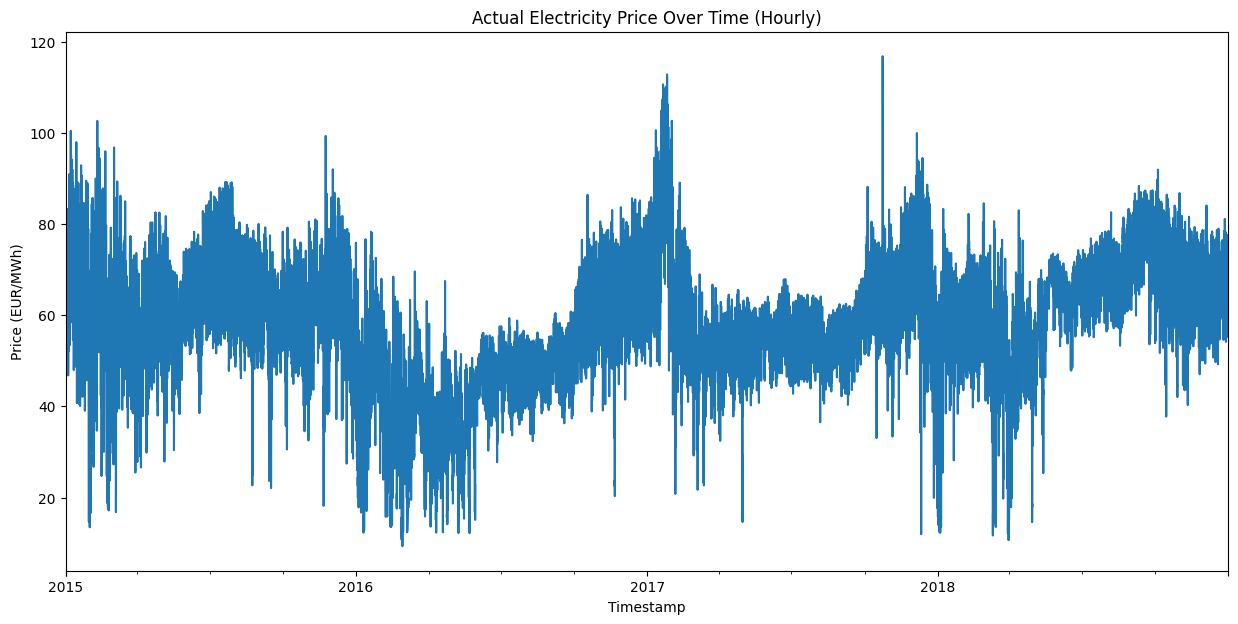

In [7]:
# Plot the 'price_actual' 

print("Plotting Actual Electricity Price...")

# Use 'df', which is our cleaned DataFrame
df['price_actual'].plot(figsize=(15, 7))
plt.title('Actual Electricity Price Over Time (Hourly)')
plt.ylabel('Price (EUR/MWh)')
plt.xlabel('Timestamp')

plt.savefig('actual_electricity_price.png')
plt.show()

Plotting Daily and Monthly Average Prices...


C:\Users\SANJANA\AppData\Local\Temp\ipykernel_15604\176394379.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['price_actual'].resample('M').mean().plot(ax=axes[1], title='Mean Monthly Electricity Price')


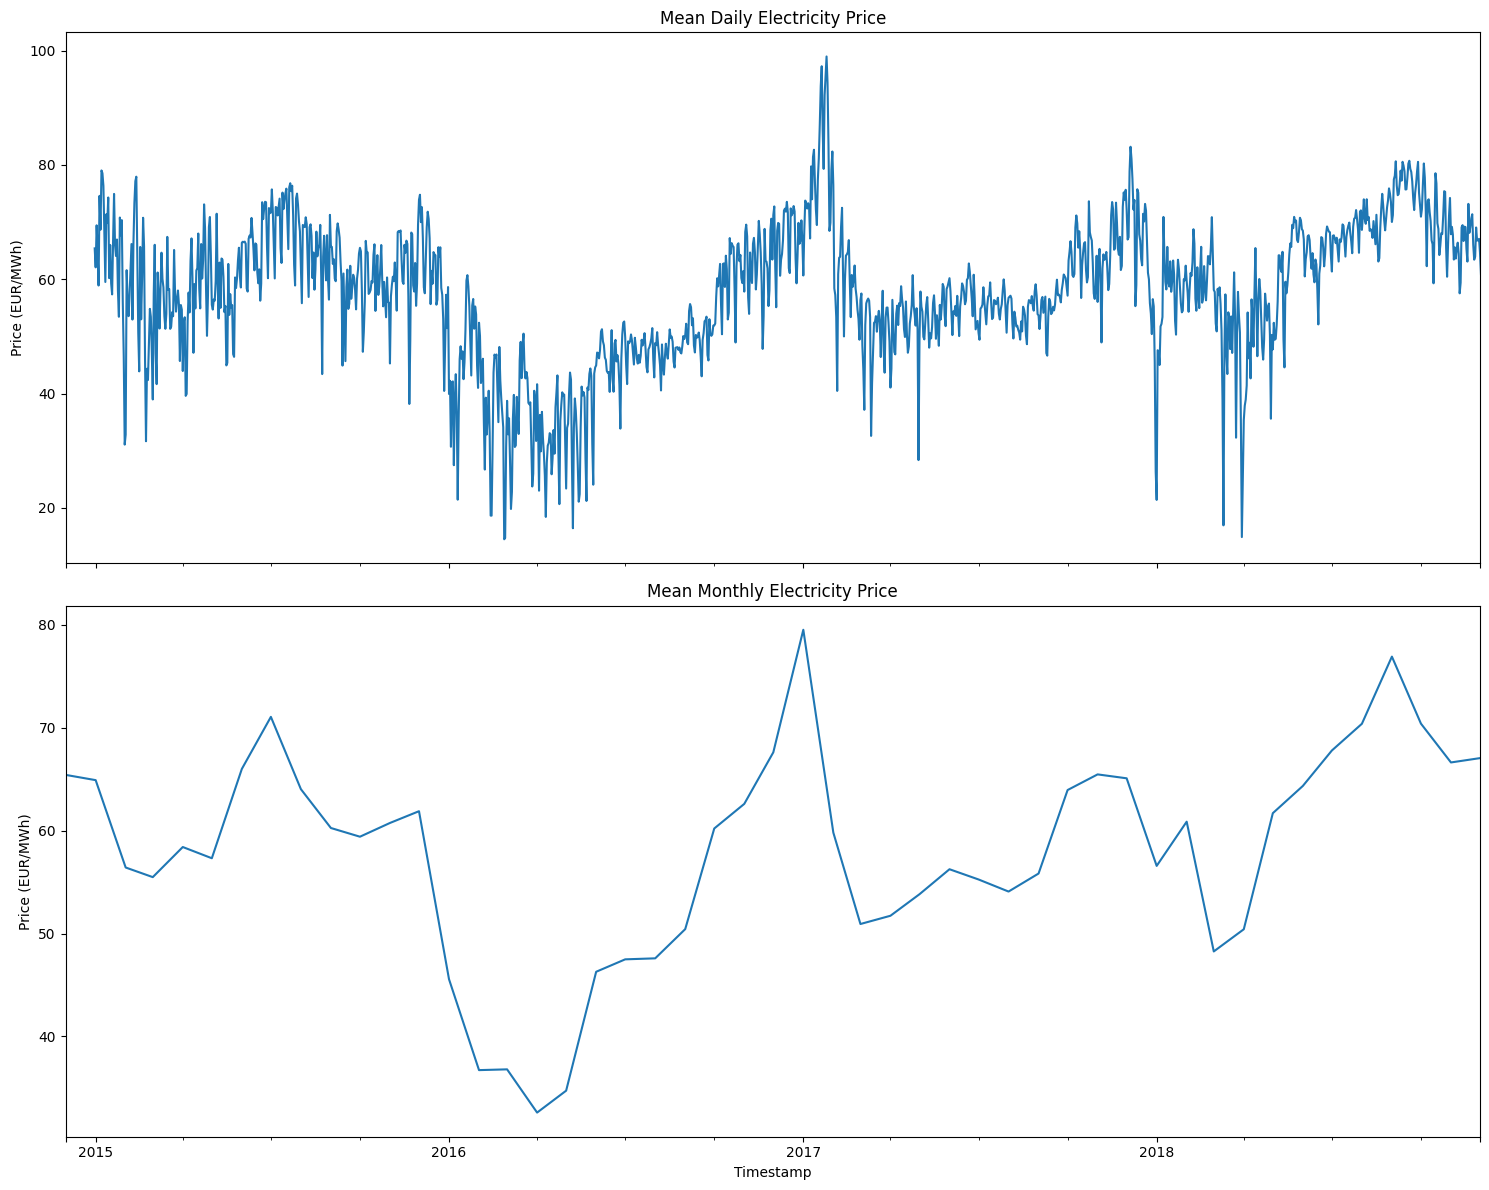

In [8]:
# Resample to Daily and Monthly averages 

print("Plotting Daily and Monthly Average Prices...")

fig, axes = plt.subplots(2, 1, figsize=(15, 12), sharex=True)

# Daily
df['price_actual'].resample('D').mean().plot(ax=axes[0], title='Mean Daily Electricity Price')
axes[0].set_ylabel('Price (EUR/MWh)')

# Monthly
df['price_actual'].resample('M').mean().plot(ax=axes[1], title='Mean Monthly Electricity Price')
axes[1].set_ylabel('Price (EUR/MWh)')

plt.xlabel('Timestamp')
plt.tight_layout()

plt.savefig('daily_monthly_average_prices.png')
plt.show()


Calculating Correlation Heatmap (on 10% sample)...


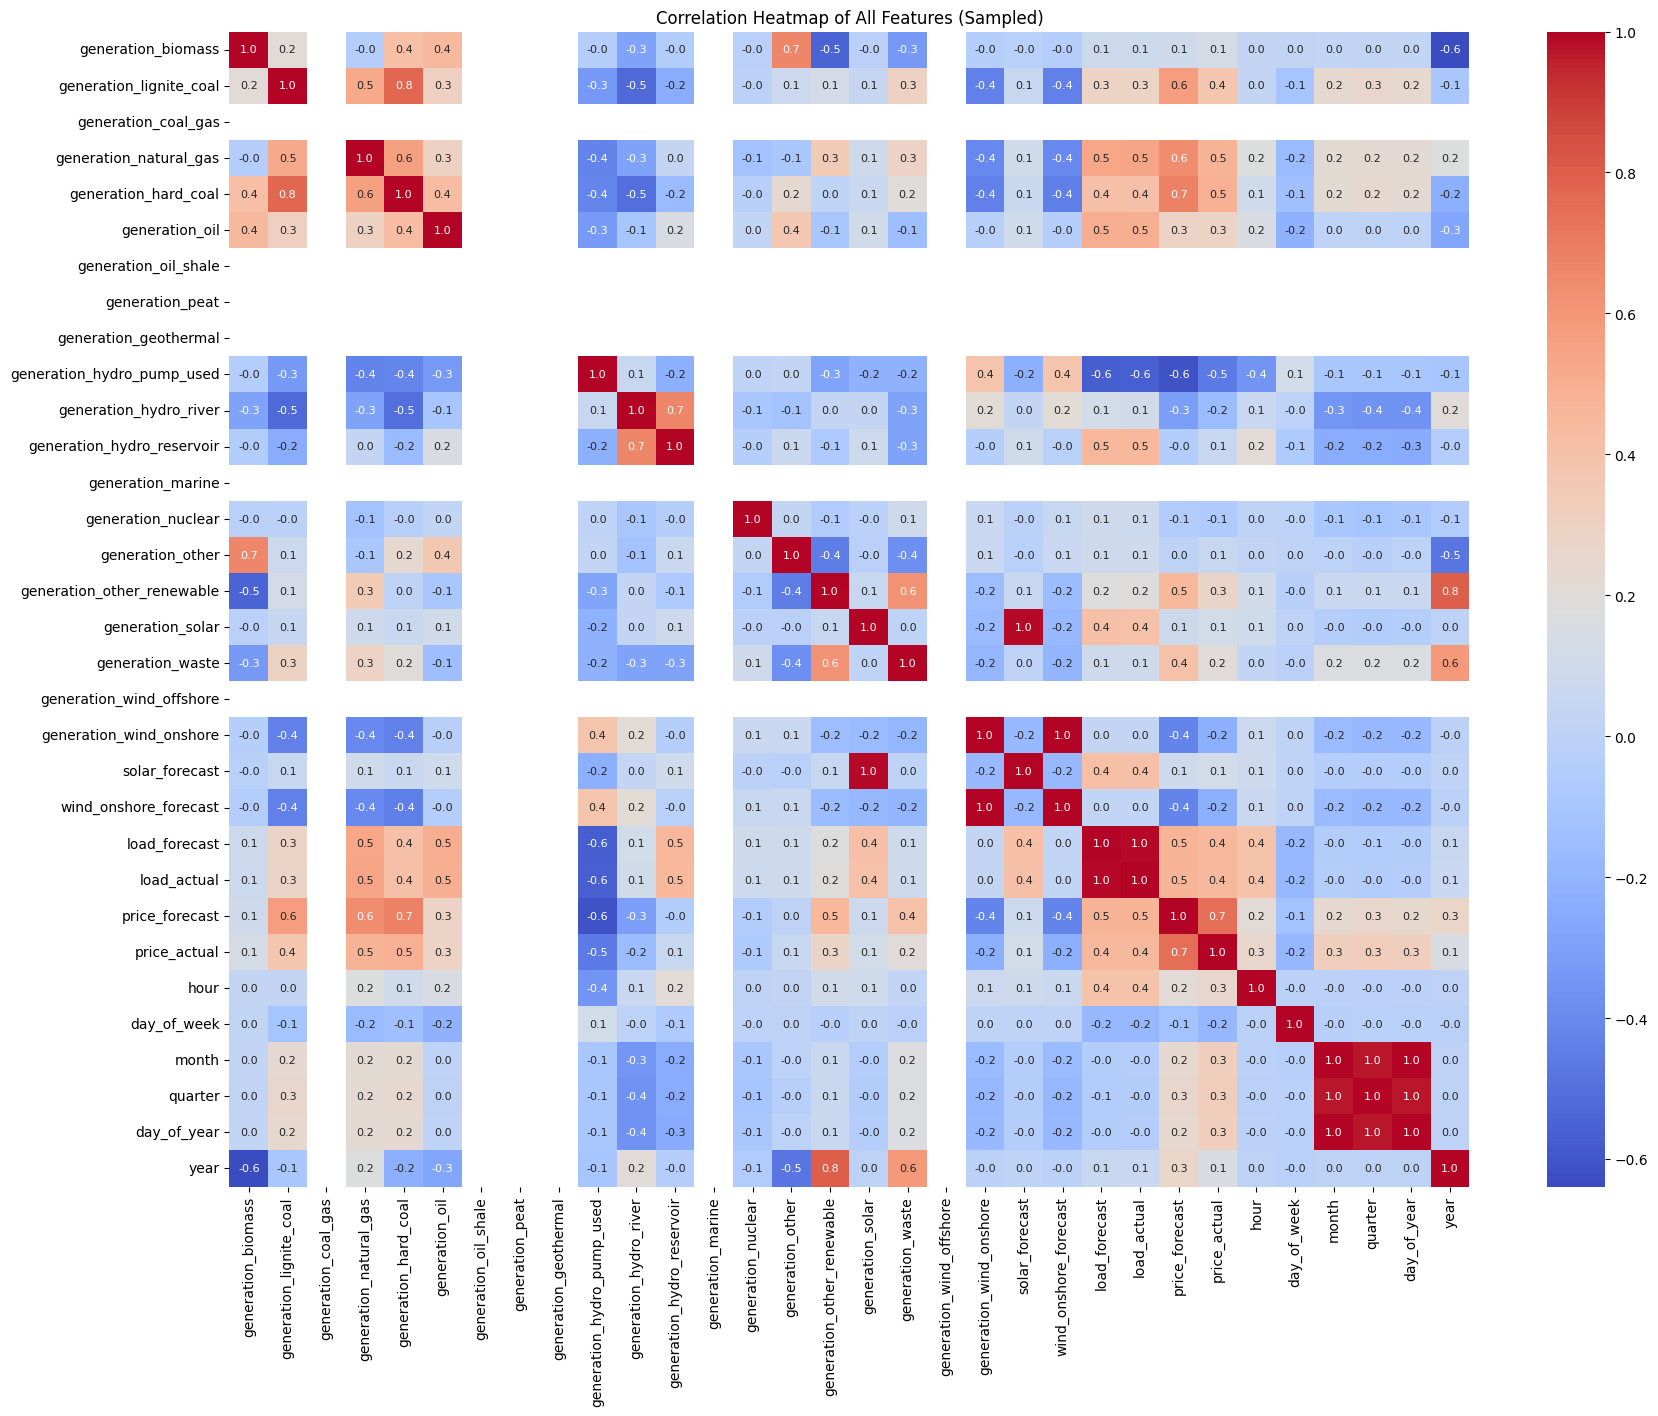

In [9]:
# Correlation Heatmap 

# We'll just sample 10% of the data for this to run faster
# .corr() already handles numeric-only columns
print("Calculating Correlation Heatmap (on 10% sample)...")
correlation_matrix = df.sample(frac=0.1).corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f', annot_kws={"size": 8})
plt.title('Correlation Heatmap of All Features (Sampled)')

plt.savefig('correlation_heatmap.png')
plt.show()


In [10]:
# Display Final Processed DataFrame 

print("Final dataset with all new features:")
df.head()

Final dataset with all new features:


,generation_biomass,generation_lignite_coal,generation_coal_gas,generation_natural_gas,generation_hard_coal,generation_oil,generation_oil_shale,generation_peat,generation_geothermal,generation_hydro_pump_used,generation_hydro_river,generation_hydro_reservoir,generation_marine,generation_nuclear,generation_other,generation_other_renewable,generation_solar,generation_waste,generation_wind_offshore,generation_wind_onshore,solar_forecast,wind_onshore_forecast,load_forecast,load_actual,price_forecast,price_actual,hour,day_of_week,month,quarter,day_of_year,year
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447,329,0,4844,4821,162,0,0,0,863,1051,1899,0,7096,43,73,49,196,0,6378,17,6436,26118,25385,50.10,65.41,23,2,12,4,365,2014
2015-01-01 00:00:00+00:00,449,328,0,5196,4755,158,0,0,0,920,1009,1658,0,7096,43,71,50,195,0,5890,16,5856,24934,24382,48.10,64.92,0,3,1,1,1,2015
2015-01-01 01:00:00+00:00,448,323,0,4857,4581,157,0,0,0,1164,973,1371,0,7099,43,73,50,196,0,5461,8,5454,23515,22734,47.33,64.48,1,3,1,1,1,2015
2015-01-01 02:00:00+00:00,438,254,0,4314,4131,160,0,0,0,1503,949,779,0,7098,43,75,50,191,0,5238,2,5151,22642,21286,42.27,59.32,2,3,1,1,1,2015
2015-01-01 03:00:00+00:00,428,187,0,4130,3840,156,0,0,0,1826,953,720,0,7097,43,74,42,189,0,4935,9,4861,21785,20264,38.41,56.04,3,3,1,1,1,2015


In [11]:
# Save Our Clean Data for Week 2 

# 1. Create a new sub-folder named 'Week 2' in the main project directory
# We use '../' to go UP one folder from our current 'Week 1' folder
output_folder = '../Week 2' 
os.makedirs(output_folder, exist_ok=True)

# 2. Define the path for our new file inside that new folder
output_path = os.path.join(output_folder, 'processed_dataset.csv')

# 3. Save the file
df.to_csv(output_path)

print(f"Success! Processed data saved to: {output_path}")

Success! Processed data saved to: ../Week 2\processed_dataset.csv
